# Etapa 1
## Esta célula primeiramente importa as bibliotecas pandas e matplotlib, depois faz a leitura do arquivogoogleplaystore.csv e retira suas duplicatas

In [1]:
# Etapa 1
import pandas as pan
import matplotlib.pyplot as mat

#Leitura do arquivo .csv e retirada das duplicatas
arquivo = pan.read_csv("googleplaystore.csv")
arquivo.drop_duplicates(inplace=True)

# Etapa 2
## Esta célula vai pegar os dados da coluna "Installs" e retirar os sinais "+" e ",", depois disso vai converter para número e retirar os erros. Após isso, vai armazenar os top 5 apps por número de instalações e exibi-los em um gráfico de barras


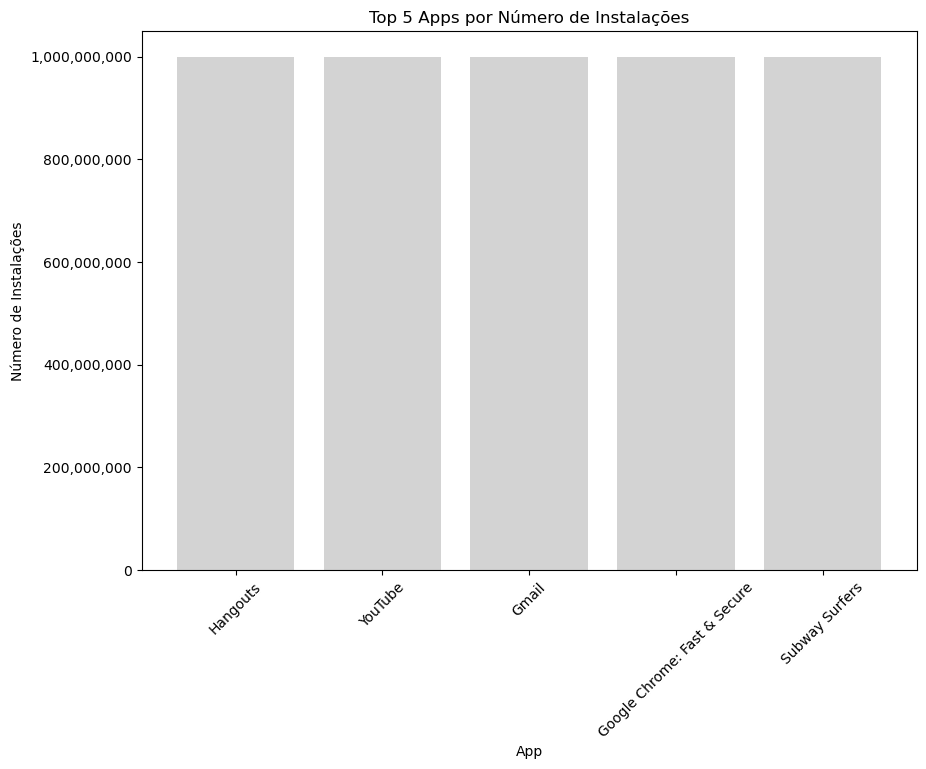

In [3]:
#Etapa 2 

# Conversão da coluna 'Installs' para string e remoção dos sinais de '+' e ','
arquivo['Installs'] = arquivo['Installs'].astype(str).str.replace('[+,]', '', regex=True)

# Conversão da coluna 'Installs' para numérico, forçando erros para NaN
arquivo['Installs'] = pan.to_numeric(arquivo['Installs'], errors='coerce')

# Remoção das linhas com NaN na coluna 'Installs'
arquivo = arquivo.dropna(subset=['Installs'])

# Armazenar os top 5 apps por número de instalações
top5 = arquivo.sort_values(by='Installs', ascending=False).head(5)

# Plotar o gráfico de barras
mat.figure(figsize=(10, 7))
mat.bar(top5['App'], top5['Installs'], color='lightgrey')
mat.xlabel('App')
mat.ylabel('Número de Instalações')
mat.title('Top 5 Apps por Número de Instalações')
mat.xticks(rotation=45)

mat.gca().yaxis.set_major_formatter(mat.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
mat.show()



# Etapa 3
## Esta célula vai primeiramente contabilizar a frequência de cada categoria e concatenar todas as categoria com % abaixo de 1.7 na categoria "Other" para não atrapalhar a visualização do gráfico. Após isso será feita uma recontagem após a agregação e por fim a exibição do gráfico de pizza

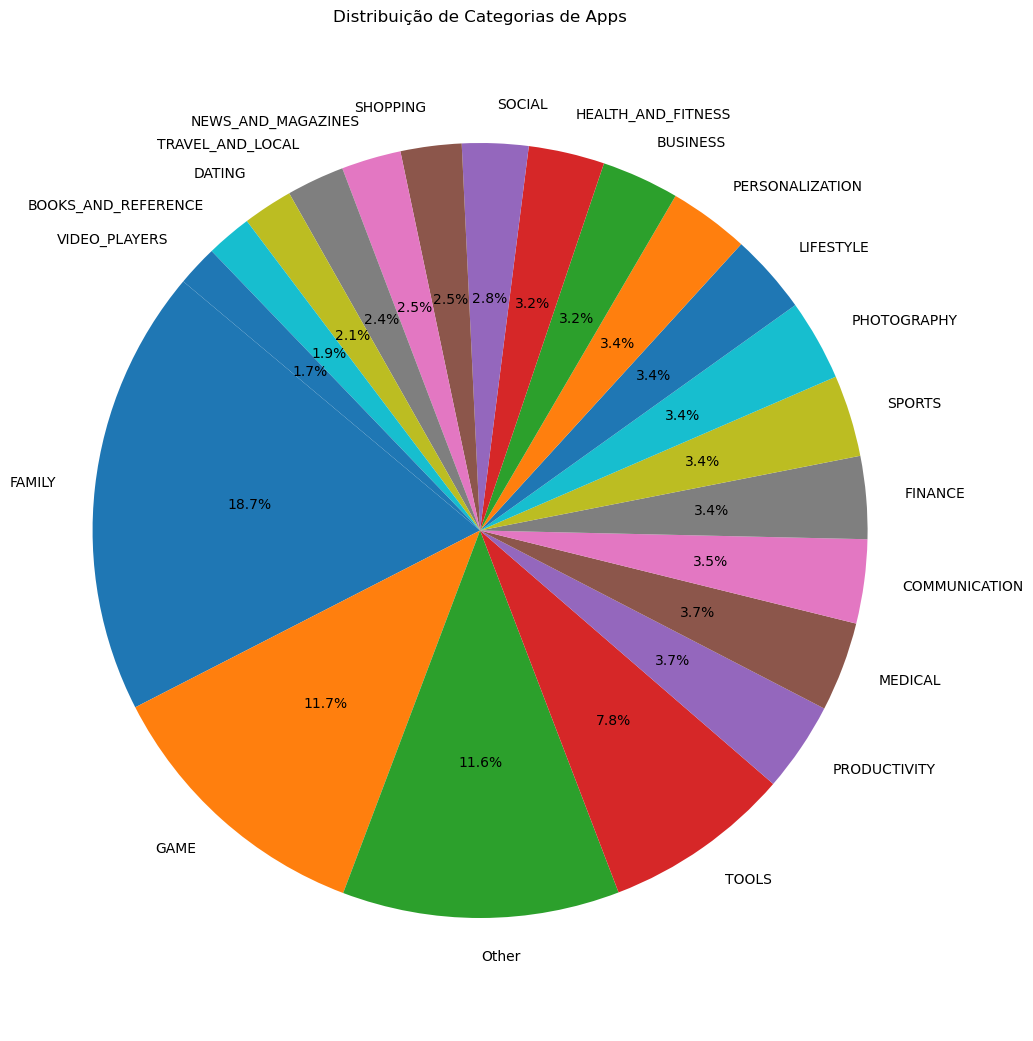

In [113]:
#Etapa 3

# Contagem da frequência de cada categoria
category_counts = arquivo['Category'].value_counts()

# Calculo da porcentagem de cada categoria
category_percent = category_counts / category_counts.sum() * 100

# Separação das categorias com menos de 1% em 'Other'
other_categories = category_percent[category_percent < 1.7].index
arquivo['Category'] = arquivo['Category'].apply(lambda x: 'Other' if x in other_categories else x)

# Recontagem das frequências das categorias após a agregação
category_counts = arquivo['Category'].value_counts()

# Configurando o gráfico de pizza
mat.figure(figsize=(11, 13))
mat.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
mat.title('Distribuição de Categorias de Apps')
mat.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
mat.show()


# Etapa 4
## Esta célula pega os dados da coluna "Price" e faz a retirada do simbolo "$" para poder converter para o tipo float, após isso ele vai procurar o valor maximo na coluna e exibir na tela o app que possui esse valor

In [7]:
#Etapa 4

# Conversão da coluna 'Price' para numérica
arquivo['Price'] = arquivo['Price'].replace('[\$,]', '', regex=True).astype(float)

# Encontrando o aplicativo mais caro
most_expensive_app = arquivo.loc[arquivo['Price'].idxmax()]

print("O aplicativo mais caro é:")
print(most_expensive_app)


O aplicativo mais caro é:
App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                  7.3M
Installs                           10000.0
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object


# Etapa 5
## Esta célula vai pegar os dados da coluna "Content Rating" e filtrar por aqueles que tenham a classificação "Mature 17+" e depois contabilizar a quantiadade deles e exibir

In [9]:
#Etapa 5

# Filtragem dos aplicativos classificados como "Mature 17+"
mature_apps = arquivo[arquivo['Content Rating'] == 'Mature 17+']

# Contagem da quantidade de aplicativos classificados como "Mature 17+"
mature_apps_count = mature_apps.shape[0]

print("Quantidade de aplicativos classificados como 'Mature 17+':")
print(mature_apps_count)


Quantidade de aplicativos classificados como 'Mature 17+':
447


# Etapa 6
## Esta célula retira as virgulas da coluna "Reviews" e após isso retira os apps de mesmo nome e mantem o que tenha mais reviews. Depois ordena de forma decrescente pelo número de reviews e exibi na tela o top 10 e a quantidade de reviews


In [11]:
#Etapa 6

# Conversão da coluna 'Reviews' para numérica
arquivo['Reviews'] = arquivo['Reviews'].replace(',', '', regex=True).astype(int)

# Remoção de duplicatas baseadas no nome do aplicativo, mantendo aquele com o maior número de reviews
arquivo = arquivo.loc[arquivo.groupby('App')['Reviews'].idxmax()]

# Ordenação do dataframe pelo número de reviews em ordem decrescente
arquivo_sorted = arquivo.sort_values(by='Reviews', ascending=False)

# Seleção dos top 10 aplicativos por número de reviews
top_10_apps = arquivo_sorted[['App', 'Reviews']].head(10)

print("Top 10 aplicativos por número de reviews:")
print(top_10_apps)

Top 10 aplicativos por número de reviews:
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2604                                          Instagram  66577446
382            Messenger – Text and Video Chat for Free  56646578
1879                                     Clash of Clans  44893888
4005            Clean Master- Space Cleaner & Antivirus  42916526
1872                                     Subway Surfers  27725352
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1878                                       Clash Royale  23136735


# Etapa 7
## Esta célula possui duas partes:
### Na primeira parte ela vai separar por categoria os apps e ordenar de forma decrescente pela quantidade de reviews. Após isso, vai pegar a média de reviews de cada categória, ordenar as médias de forma decrescente e exibir a lista. 

### Na segunda parte a célula vai procurar o aplicativo que contenha a data mais antiga na coluna "Last Updated" e exibi-lo.

In [17]:
#Etapa 7
# Cálculo 1: Média do número de reviews por categoria
average_reviews_per_category = arquivo.groupby('Category')['Reviews'].mean().sort_values(ascending=False)

# Converção da série para dataframe
average_reviews_per_category_df = average_reviews_per_category.reset_index()
average_reviews_per_category_df.columns = ['Category', 'Average Reviews']

print("\nMédia do número de reviews por categoria:")
print(average_reviews_per_category_df)

# Cálculo 2: Aplicativo mais antigo (data de atualização mais antiga)
# Conversão a coluna 'Last Updated' para datetime
arquivo['Last Updated'] = pan.to_datetime(arquivo['Last Updated'])

# Encontrando o aplicativo mais antigo
oldest_app = arquivo.loc[arquivo['Last Updated'].idxmin()]

print("\nO aplicativo mais antigo é:")
print(f"App: {oldest_app['App']}, Last Updated: {oldest_app['Last Updated']}")


Média do número de reviews por categoria:
               Category  Average Reviews
0                SOCIAL    953708.598326
1         COMMUNICATION    907378.038095
2                  GAME    624494.915433
3           PHOTOGRAPHY    375731.217082
4                 TOOLS    276805.343788
5              SHOPPING    220564.688119
6          PRODUCTIVITY    148638.652406
7       PERSONALIZATION    142401.906915
8      TRAVEL_AND_LOCAL    122471.913242
9                 Other    119062.500822
10               SPORTS    108766.640000
11               FAMILY    103239.211313
12   NEWS_AND_MAGAZINES     91065.677165
13  BOOKS_AND_REFERENCE     75328.256757
14   HEALTH_AND_FITNESS     74186.527778
15              FINANCE     36704.269565
16            LIFESTYLE     32066.915989
17             BUSINESS     23550.054762
18               DATING     21316.717647
19              MEDICAL      3006.425316

O aplicativo mais antigo é:
App: FML F*ck my life + widget, Last Updated: 2010-05-21 00:00:00


# Etapa 8
## Gráfico 1
### Esta célula vai primeiramente contabilizar a quantidade de apps com cada tipo de content rating da coluna "Content Rating", após isso vai mostrar por meio de gráfico de linhas a quantidade de cada um

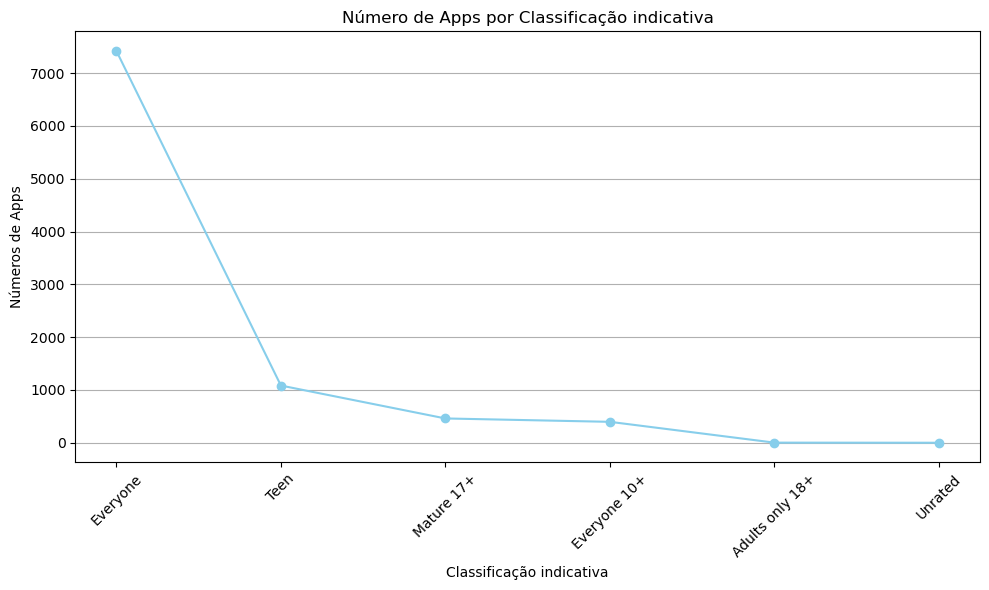

In [123]:
# Etapa 8
# Gráfico 1
# Contagem do números de apps por classificação indicativa
classificacao_indicativa = arquivo['Content Rating'].value_counts()

# Configurando o Gráfico
plt.figure(figsize=(10, 6))
classificacao_indicativa.plot(kind='line', marker='o', color='skyblue')  # Usando kind='line'
plt.title('Número de Apps por Classificação indicativa')
plt.xlabel('Classificação indicativa')
plt.ylabel('Números de Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()




# Etapa 8
## Gráfico 2
### Esta célula vai primeiramente remover todos os valores não númericos da coluna "Reviews" e depois converte-los para int, após isso, vai fazer o mesmo na coluna "Rating" mas convertendo para float. No final vai converter os valores das reviews para ficar em milhões e exibir por meio de um gráfico de dispersão mostrando a relação entre número de avaliações (em milhões) e classificações.

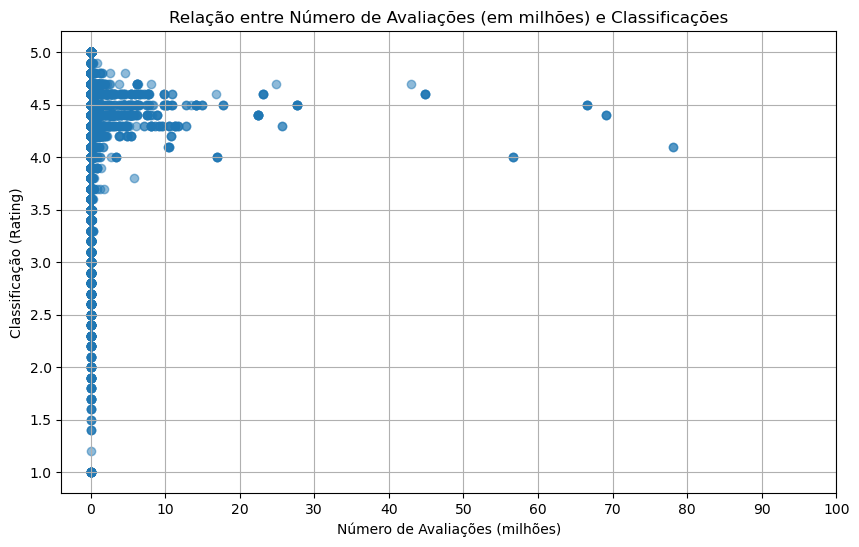

In [109]:
# Etapa 8 
# Gráfico 2
# Remoção dos valores não numéricos da coluna 'Reviews' e converter para int
arquivo['Reviews'] = pan.to_numeric(arquivo['Reviews'], errors='coerce')
arquivo = arquivo.dropna(subset=['Reviews'])
arquivo['Reviews'] = arquivo['Reviews'].astype(int)

# Remoção dos valores não numéricos na coluna 'Rating' e converter para float
arquivo['Rating'] = pan.to_numeric(arquivo['Rating'], errors='coerce')
arquivo = arquivo.dropna(subset=['Rating'])

# Conversão das Reviews para milhões
arquivo['Reviews (Millions)'] = arquivo['Reviews'] / 1e6

# Configurando o gráfico 
mat.figure(figsize=(10, 6))
mat.scatter(arquivo['Reviews (Millions)'], arquivo['Rating'], alpha=0.5)
mat.title('Relação entre Número de Avaliações (em milhões) e Classificações')
mat.xlabel('Número de Avaliações (milhões)')
mat.ylabel('Classificação (Rating)')
mat.xticks(range(0, 101, 10))  # Define os ticks de 0 a 100 com intervalos de 10
mat.grid(True)
mat.show()
